In [1]:
import pandas as pd
import matplotlib as nlp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as estadísticas
import ast
import time
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r'../data_set_limpio//games_preparado.csv.gz')
item = pd.read_csv(r'../data_set_limpio//item_desplegado.csv.gz')
opinion = pd.read_csv(r'../data_set_limpio//reviews_preparado.csv.gz')
games_dummies = pd.read_csv(r'../data_set_limpio//games_dummies.csv.gz')


C:\Users\jonat\AppData\Local\Temp\ipykernel_19876\2496938268.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  games_dummies = pd.read_csv(r'../data_set_limpio//games_dummies.csv.gz')


<h1>Mi primer paso fue realizar un analisis visual de los datos con los cuales voy a trabajar</h1>

In [24]:
df.head()

,publisher,app_name,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140,Kotoshiro
1,"Making Fun, Inc.",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,643980,Secret Level SRL
2,Poolians.com,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,670290,Poolians.com
3,彼岸领域,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400,彼岸领域
4,Trickjump Games Ltd,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,0.0,772540,Trickjump Games Ltd


In [4]:
df.shape

(27220, 11)

In [5]:
item.head()

,item_id,item_name,playtime_forever,user,id,price
0,10,Counter-Strike,6,76561197970982479,10.0,9.99
1,30,Day of Defeat,7,76561197970982479,30.0,4.99
2,300,Day of Defeat: Source,4733,76561197970982479,300.0,9.99
3,240,Counter-Strike: Source,1853,76561197970982479,240.0,19.99
4,3830,Psychonauts,333,76561197970982479,3830.0,9.99


In [6]:
item.shape

(2748512, 6)

In [7]:
opinion.head()

,posted,item_id,helpful,recommend,review,user,opinion
0,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,2
1,"Posted July 15, 2011.",22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,2
2,"Posted April 21, 2011.",43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,2
3,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,2
4,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,2


In [8]:
opinion.shape

(59305, 7)

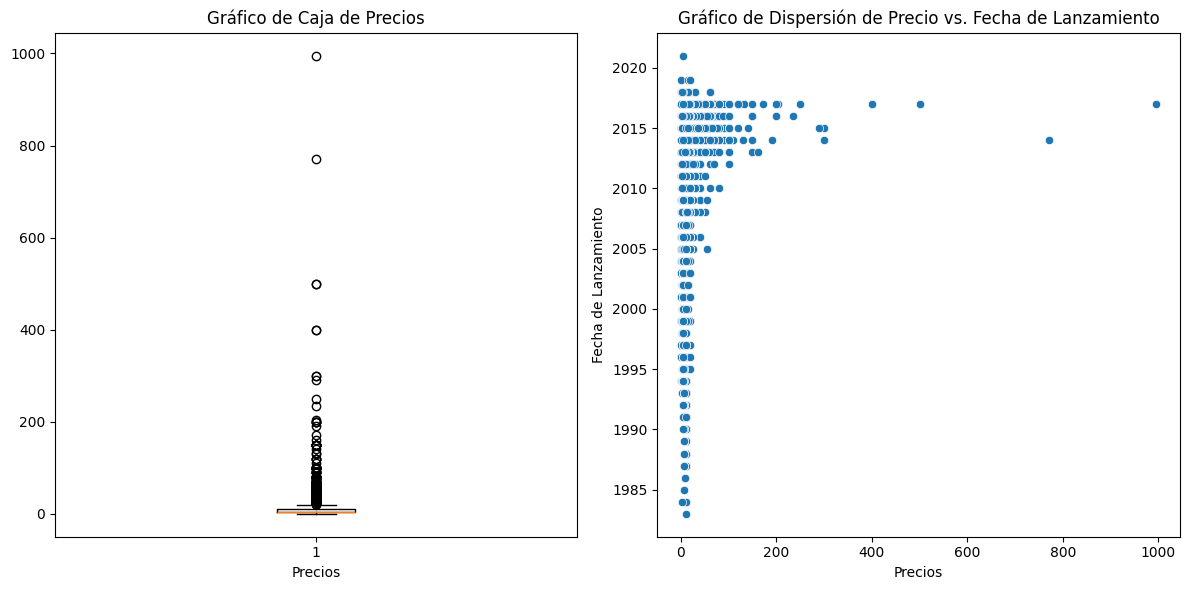

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['price'])
ax1.set_xlabel('Precios')
ax1.set_title('Gráfico de Caja de Precios')

sns.scatterplot(x=df['price'], y=df['release_date'], data=df, ax=ax2)
ax2.set_xlabel('Precios')
ax2.set_ylabel('Fecha de Lanzamiento')
ax2.set_title('Gráfico de Dispersión de Precio vs. Fecha de Lanzamiento')

plt.tight_layout()
plt.show()

In [10]:
df = df[df['price'] <= 80]

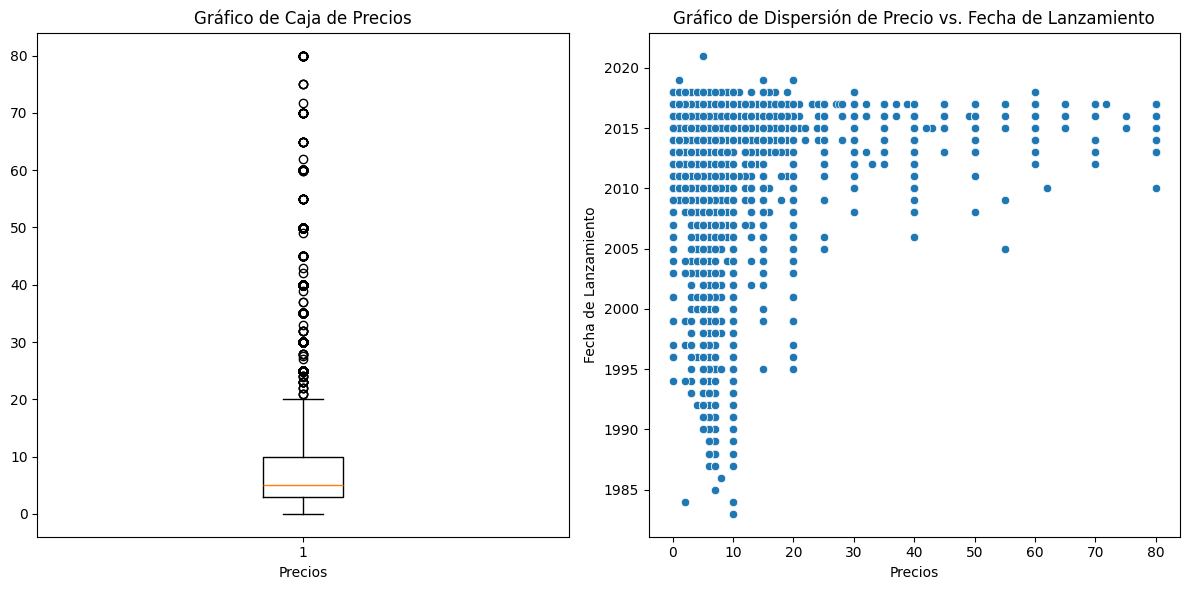

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['price'])
ax1.set_xlabel('Precios')
ax1.set_title('Gráfico de Caja de Precios')

sns.scatterplot(x=df['price'], y=df['release_date'], data=df, ax=ax2)
ax2.set_xlabel('Precios')
ax2.set_ylabel('Fecha de Lanzamiento')
ax2.set_title('Gráfico de Dispersión de Precio vs. Fecha de Lanzamiento')

plt.tight_layout()
plt.show()

In [14]:
df = df[df['release_date'] >= 2003]

In [47]:
dicc = {}
developers = df['developer'].unique()
for x in developers:
    dicc[x] = 0

In [48]:

for x,e in df[['developer','price']].values:
    for i in developers:
        if i == x:
            dicc[i] += e
    

In [49]:
valores_mas_altos = sorted(dicc.items(), key=lambda x: x[1], reverse=True)[:5]

top_5 = {}
for clave, valor in valores_mas_altos:
    top_5[clave] = valor

In [50]:
top_5

{'SmiteWorks USA, LLC': 7737.919999999875,
 'Ubisoft - San Francisco': 5556.419999999833,
 'Dovetail Games': 4222.479999999971,
 'KOEI TECMO GAMES CO., LTD.': 2755.4499999999907,
 'N3V Games': 1501.1000000000006}

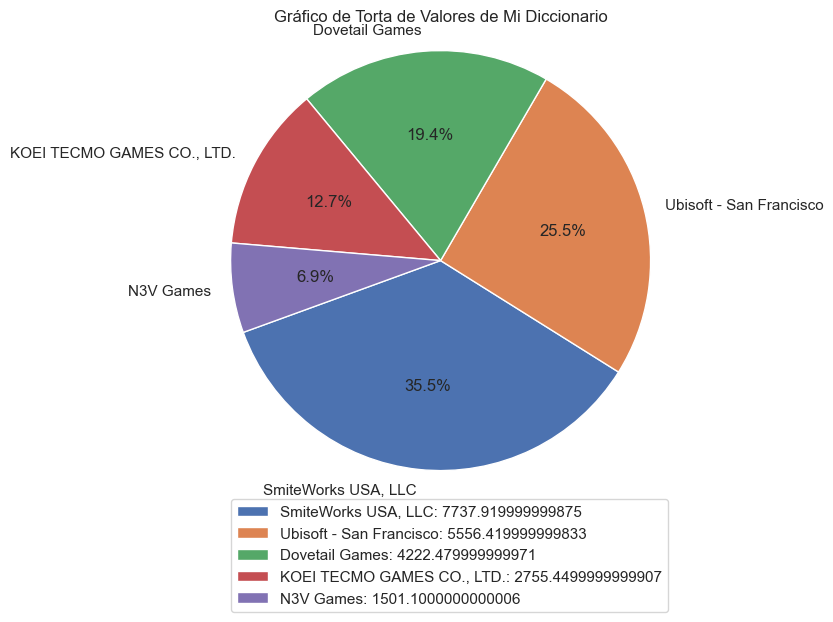

In [69]:
valores = list(top_5.values())
claves = list(top_5.keys())
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(valores, labels=claves, autopct='%1.1f%%', startangle=200)

plt.axis('equal')
plt.title('Top 5 desarrolladores con mayores ventas')

# Muestra los nombres de las claves como una leyenda en la esquina inferior izquierda
legend_labels = [f"{key}: {valores[i]}" for i, key in enumerate(claves)]
plt.legend(wedges, legend_labels, loc="upper left", bbox_to_anchor=(0.15, 0))

plt.show()


In [70]:
dicc = {}
developers = opinion['user'].unique()
for x in developers:
    dicc[x] = 0

In [83]:
for x,y in dicc.items():
    dicc[x] = len(opinion.loc[opinion['user'] == x])

In [89]:
valores_mas_altos = sorted(dicc.items(), key=lambda x: x[1], reverse=True)[:8]

top_5 = {}
for clave, valor in valores_mas_altos:
    top_5[clave] = valor

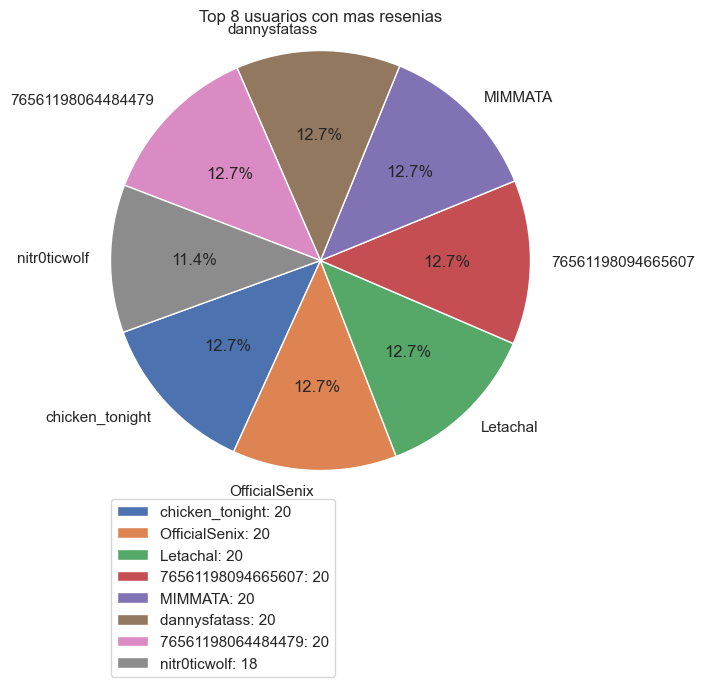

In [91]:
valores = list(top_5.values())
claves = list(top_5.keys())
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(valores, labels=claves, autopct='%1.1f%%', startangle=200)

plt.axis('equal')
plt.title('Top 8 usuarios con mas resenias')

# Muestra los nombres de las claves como una leyenda en la esquina inferior izquierda
legend_labels = [f"{key}: {valores[i]}" for i, key in enumerate(claves)]
plt.legend(wedges, legend_labels, loc="upper left", bbox_to_anchor=(0.15, 0))

plt.show()


In [98]:
dicc = {}
developers = item['user'].unique()
for x in developers:
    dicc[x] = 0

In [99]:
for x,e in item[['user','price']].values:
    for i in developers:
        if i == x:
            dicc[i] += e

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jonat\AppData\Local\Temp\ipykernel_19876\2657923810.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\ultratb.py", lin

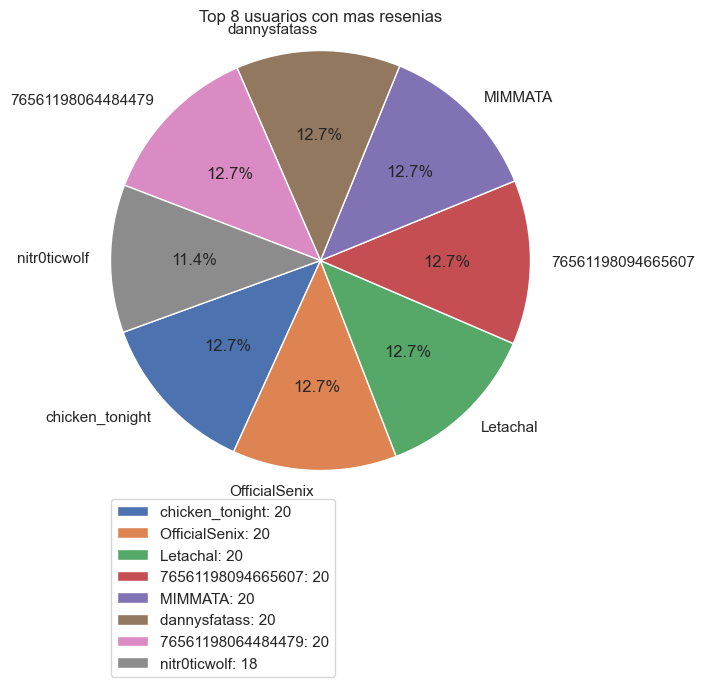

In [100]:
valores = list(top_5.values())
claves = list(top_5.keys())
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(valores, labels=claves, autopct='%1.1f%%', startangle=200)

plt.axis('equal')
plt.title('Top 8 usuarios con mas resenias')

# Muestra los nombres de las claves como una leyenda en la esquina inferior izquierda
legend_labels = [f"{key}: {valores[i]}" for i, key in enumerate(claves)]
plt.legend(wedges, legend_labels, loc="upper left", bbox_to_anchor=(0.15, 0))

plt.show()


In [ ]:
df